# Image classification with Convolutional Neural Networks

In [0]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

## Google Collab Setup

In [0]:
# https://opencv.org/
!apt-get -qq install -y libsm6 libxext6 && pip install -q -U opencv-python


In [0]:
import cv2

In [4]:
!pip install fastai

    100% |████████████████████████████████| 430kB 1.9MB/s 
    100% |████████████████████████████████| 1.2MB 1.0MB/s 
    100% |████████████████████████████████| 1.3MB 1.1MB/s 
    100% |████████████████████████████████| 71kB 8.2MB/s 
    100% |████████████████████████████████| 256kB 3.6MB/s 
    63% |████████████████████▏           | 13.1MB 45.0MB/s eta 0:00:01

    100% |████████████████████████████████| 20.8MB 69kB/s 
    100% |████████████████████████████████| 3.4MB 402kB/s 
    100% |████████████████████████████████| 112kB 10.2MB/s 
    100% |████████████████████████████████| 51kB 11.8MB/s 
    100% |████████████████████████████████| 61kB 10.7MB/s 
    100% |████████████████████████████████| 2.2MB 606kB/s 
    100% |████████████████████████████████| 552kB 2.6MB/s 


    100% |████████████████████████████████| 61kB 9.1MB/s 
    100% |████████████████████████████████| 4.1MB 363kB/s 
    100% |████████████████████████████████| 6.9MB 191kB/s 
    100% |████████████████████████████████| 92kB 8.5MB/s 
    100% |████████████████████████████████| 860kB 1.5MB/s 
    100% |████████████████████████████████| 5.7MB 249kB/s 
    100% |████████████████████████████████| 471kB 2.3MB/s 
    100% |████████████████████████████████| 81kB 10.0MB/s 
    100% |████████████████████████████████| 71kB 7.2MB/s 
    100% |████████████████████████████████| 174kB 7.2MB/s 
    100% |████████████████████████████████| 102kB 9.6MB/s 


    100% |████████████████████████████████| 81kB 7.7MB/s 
  Running setup.py bdist_wheel for fastai ... - \ done
  Stored in directory: /content/.cache/pip/wheels/13/6b/e1/1f1c38574e6abf3cfd747b345213ed1a4e2bf149646e16408d
  Running setup.py bdist_wheel for bcolz ... - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | done
  Stored in directory: /content/.cache/pip/wheels/e9/84/eb/f8f3caa627bb01ebc96034c3411f59870951246e5873b3f4c7
  Running setup.py bdist_wheel for feather-format ... - done
  Stored in directory: /content/.cache/pip/wheels/9d/de/23/0ca11012cc6b573de3f8187727cfa97a8392a8605e331214e5
  Running setup.py bdist_wheel for kaggle-cli ... - done
  Stored in directory: /content/.cache/pip/wheels/f0/3c/ff/c98870eeb0ca26250ce6a60dc9be23f547b7ef68b3d6a1c0b5
  Running setup.py bdist_wheel for pandas-summary ... - done
  Stored in director

 done
  Stored in directory: /content/.cache/pip/wheels/27/4c/aa/0f67aa384e67aacc5629321b1a3f85892362d4e9e5cd3a20f1
  Running setup.py bdist_wheel for configparser ... - done
  Stored in directory: /content/.cache/pip/wheels/1c/bd/b4/277af3f6c40645661b4cd1c21df26aca0f2e1e9714a1d4cda8
  Running setup.py bdist_wheel for PrettyTable ... - done
  Stored in directory: /content/.cache/pip/wheels/b6/90/7b/1c22b89217d0eba6d5f406e562365ebee804f0d4595b2bdbcd
  Running setup.py bdist_wheel for cmd2 ... - done
  Stored in directory: /content/.cache/pip/wheels/1f/e1/ae/873458777d294b72291b2300bca9a5ffa6724dbe440e930a43
  Running setup.py bdist_wheel for pyperclip ... - done
  Stored in directory: /content/.cache/pip/wheels/a9/22/c3/8116911c3273f6aa0a90ce69c44fb8a6a0e139d79aeda5a73e
Successfully built fastai bcolz feather-format kaggle-cli pandas-summary jupyter-latex-envs cliff configparser PrettyTable cmd2 pyperclip


In [0]:
# http://pytorch.org/
from os import path
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())

accelerator = 'cu80' if path.exists('/opt/bin/nvidia-smi') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.3.0.post4-{platform}-linux_x86_64.whl torchvision
import torch

In [6]:
accelerator

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:80: RuntimeWarning: The _imaging extension was built for another version of Pillow or PIL:
Core version: 4.0.0
Pillow version: 5.0.0
  warnings.warn(str(v), RuntimeWarning)
[autoreload of PIL.Image failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
ImportError: The _imaging extension was built for another version of Pillow or PIL:
Core version: 4.0.0
Pillow version: 5.0.0
]


'cu80'

In [7]:
torch.cuda.is_available()

True

In [8]:
torch.backends.cudnn.enabled

True

## Workaround for an issue with PIL

In [9]:
!pip install Pillow==4.0.0
!pip install PIL
!pip install image

    100% |████████████████████████████████| 5.6MB 253kB/s 
  Found existing installation: Pillow 5.0.0
    Uninstalling Pillow-5.0.0:
      Successfully uninstalled Pillow-5.0.0
  Could not find a version that satisfies the requirement PIL (from versions: )
No matching distribution found for PIL
    100% |████████████████████████████████| 7.1MB 203kB/s 


## Download data

In [10]:
!ls

datalab


In [0]:
# DATA = "drive/data/"
DATA = "data/"
PATH = DATA+"dogscats/"

sz=224

In [12]:
!mkdir {DATA} && wget -P {DATA} http://files.fast.ai/data/dogscats.zip && unzip -q {DATA}dogscats.zip -d {DATA}

--2018-03-23 03:41:48--  http://files.fast.ai/data/dogscats.zip
Resolving files.fast.ai (files.fast.ai)... 67.205.15.147
Connecting to files.fast.ai (files.fast.ai)|67.205.15.147|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 857214334 (818M) [application/zip]
Saving to: ‘data/dogscats.zip’

dogscats.zip        100%[===================>] 817.50M  28.4MB/s    in 36s     

2018-03-23 03:42:23 (23.0 MB/s) - ‘data/dogscats.zip’ saved [857214334/857214334]



In [0]:
# verify data
!ls data/dogscats/models/

In [15]:
!ls data/dogscats/

models	sample	test1  train  valid


## Investigating dataset - First look at cat pictures

In [0]:
# This file contains all the main external libs we'll use
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

Our library will assume that you have *train* and *valid* directories. It also assumes that each dir will have subdirs for each class you wish to recognize (in this case, 'cats' and 'dogs').

In [17]:
os.listdir(PATH)

['train', 'test1', 'sample', 'valid', 'models']

In [18]:
os.listdir(f'{PATH}valid')

['cats', 'dogs']

In [19]:
files = os.listdir(f'{PATH}valid/cats')[:5]
files

['cat.4161.jpg',
 'cat.4047.jpg',
 'cat.3886.jpg',
 'cat.1890.jpg',
 'cat.1145.jpg']

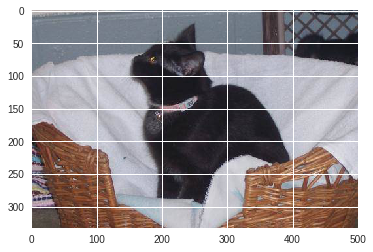

In [20]:
img = plt.imread(f'{PATH}valid/cats/{files[4]}')
plt.imshow(img);

Here is how the raw data looks like

In [21]:
img.shape

(333, 500, 3)

In [22]:
img[:4,:4]

array([[[180, 170, 168],
        [184, 174, 172],
        [188, 178, 176],
        [190, 180, 178]],

       [[183, 175, 172],
        [186, 178, 175],
        [189, 181, 178],
        [190, 182, 179]],

       [[188, 180, 177],
        [191, 183, 180],
        [193, 185, 182],
        [192, 184, 181]],

       [[184, 179, 176],
        [186, 181, 178],
        [188, 183, 180],
        [187, 182, 179]]], dtype=uint8)

In [0]:
#@title Default title text


## Our first model: quick start

We're going to use a <b>pre-trained</b> model, that is, a model created by some one else to solve a different problem. Instead of building a model from scratch to solve a similar problem, we'll use a model trained on ImageNet (1.2 million images and 1000 classes) as a starting point. The model is a Convolutional Neural Network (CNN), a type of Neural Network that builds state-of-the-art models for computer vision. We'll be learning all about CNNs during this course.

We will be using the <b>resnet34</b> model. resnet34 is a version of the model that won the 2015 ImageNet competition. Here is more info on [resnet models](https://github.com/KaimingHe/deep-residual-networks). We'll be studying them in depth later, but for now we'll focus on using them effectively.

Here's how to train and evalulate a *dogs vs cats* model in 3 lines of code, and under 20 seconds:

In [0]:
# Uncomment the below if you need to reset your precomputed activations
# shutil.rmtree(f'{PATH}tmp', ignore_errors=True)

In [24]:
arch=resnet34
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(0.01, 2)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /content/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:02<00:00, 31509475.34it/s]


100%|██████████| 32/32 [00:11<00:00,  2.71it/s]


HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

[0.      0.05428 0.03027 0.98975]
[1.      0.03659 0.02887 0.99023]



How good is this model? Well, as we mentioned, prior to this competition, the state of the art was 80% accuracy. But the competition resulted in a huge jump to 98.9% accuracy, with the author of a popular deep learning library winning the competition. Extraordinarily, less than 4 years later, we can now beat that result in seconds! Even last year in this same course, our initial model had 98.3% accuracy, which is nearly double the error we're getting just a year later, and that took around 10 minutes to compute.

### Checking Memory usage (we have limited RAM as this is on google colab)

In [26]:
!free -m

              total        used        free      shared  buff/cache   available
Mem:          13029        8151         152         281        4725        4349
Swap:             0           0           0


## Analyzing results: looking at pictures

As well as looking at the overall metrics, it's also a good idea to look at examples of each of:
1. A few correct labels at random
2. A few incorrect labels at random
3. The most correct labels of each class (ie those with highest probability that are correct)
4. The most incorrect labels of each class (ie those with highest probability that are incorrect)
5. The most uncertain labels (ie those with probability closest to 0.5).

In [27]:
# This is the label for a val data
data.val_y

array([0, 0, 0, ..., 1, 1, 1])

In [28]:
# from here we know that 'cats' is label 0 and 'dogs' is label 1.
data.classes

['cats', 'dogs']

In [29]:
# this gives prediction for validation set. Predictions are in log scale
log_preds = learn.predict()
log_preds.shape

(2000, 2)

In [30]:
log_preds[:10]

array([[ -0.00004, -10.19952],
       [ -0.12663,  -2.12917],
       [ -0.0002 ,  -8.51463],
       [ -0.00005,  -9.98767],
       [ -0.00101,  -6.89479],
       [ -0.00028,  -8.19125],
       [ -0.00003, -10.54712],
       [ -0.86939,  -0.54336],
       [ -0.00017,  -8.67076],
       [ -0.00001, -12.09745]], dtype=float32)

In [0]:
preds = np.argmax(log_preds, axis=1)  # from log probabilities to 0 or 1
probs = np.exp(log_preds[:,1])        # pr(dog)

In [32]:
preds[:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [33]:
probs[:10]

array([0.00004, 0.11894, 0.0002 , 0.00005, 0.00101, 0.00028, 0.00003, 0.58079, 0.00017, 0.00001],
      dtype=float32)

In [0]:
def rand_by_mask(mask): return np.random.choice(np.where(mask)[0], 4, replace=False)
def rand_by_correct(is_correct): return rand_by_mask((preds == data.val_y)==is_correct)

In [0]:
##only for google colb
from PIL import Image

In [0]:
def plot_val_with_title(idxs, title):
    imgs = np.stack([data.val_ds[x][0] for x in idxs])
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(data.val_ds.denorm(imgs), rows=1, titles=title_probs)

In [0]:
def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])

In [0]:
def load_img_id(ds, idx): return np.array(PIL.Image.open(PATH+ds.fnames[idx]))

def plot_val_with_title(idxs, title):
    imgs = [load_img_id(data.val_ds,x) for x in idxs]
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(imgs, rows=1, titles=title_probs, figsize=(16,8))

Correctly classified


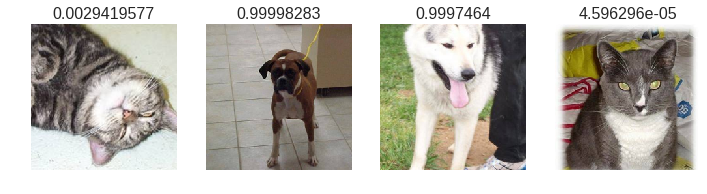

In [52]:
# 1. A few correct labels at random
plot_val_with_title(rand_by_correct(True), "Correctly classified")

Incorrectly classified


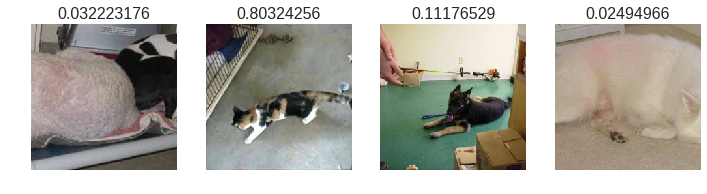

In [53]:
# 2. A few incorrect labels at random
plot_val_with_title(rand_by_correct(False), "Incorrectly classified")

In [0]:
def most_by_mask(mask, mult):
    idxs = np.where(mask)[0]
    return idxs[np.argsort(mult * probs[idxs])[:4]]

def most_by_correct(y, is_correct): 
    mult = -1 if (y==1)==is_correct else 1
    return most_by_mask(((preds == data.val_y)==is_correct) & (data.val_y == y), mult)

Most correct cats


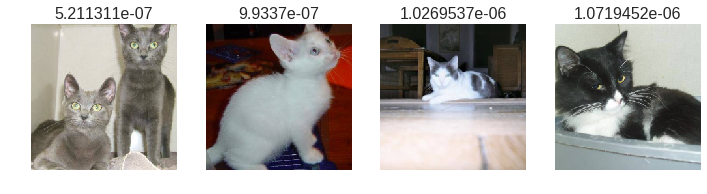

In [55]:
plot_val_with_title(most_by_correct(0, True), "Most correct cats")

Most correct dogs


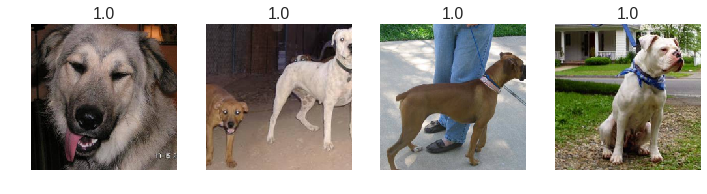

In [56]:
plot_val_with_title(most_by_correct(1, True), "Most correct dogs")

Most incorrect cats


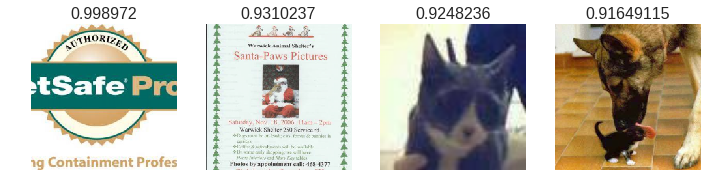

In [57]:
plot_val_with_title(most_by_correct(0, False), "Most incorrect cats")

Most incorrect dogs


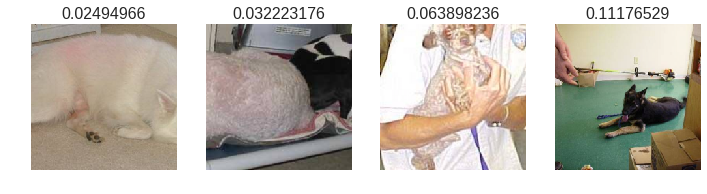

In [58]:
plot_val_with_title(most_by_correct(1, False), "Most incorrect dogs")

Most uncertain predictions


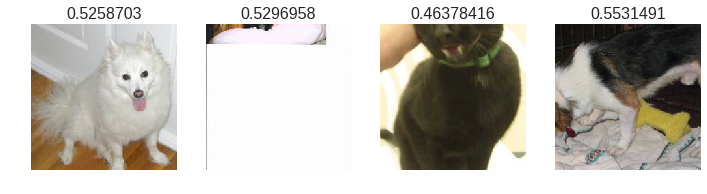

In [62]:
most_uncertain = np.argsort(np.abs(probs -0.5))[1:5]
plot_val_with_title(most_uncertain, "Most uncertain predictions")

## Choosing a learning rate

The *learning rate* determines how quickly or how slowly you want to update the *weights* (or *parameters*). Learning rate is one of the most difficult parameters to set, because it significantly affect model performance.

The method `learn.lr_find()` helps you find an optimal learning rate. It uses the technique developed in the 2015 paper [Cyclical Learning Rates for Training Neural Networks](http://arxiv.org/abs/1506.01186), where we simply keep increasing the learning rate from a very small value, until the loss stops decreasing. We can plot the learning rate across batches to see what this looks like.

We first create a new learner, since we want to know how to set the learning rate for a new (untrained) model.

In [0]:
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [69]:
learn

Sequential(
  (0): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True)
  (1): Dropout(p=0.25)
  (2): Linear(in_features=1024, out_features=512)
  (3): ReLU()
  (4): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True)
  (5): Dropout(p=0.5)
  (6): Linear(in_features=512, out_features=2)
  (7): LogSoftmax()
)

In [70]:
 lrf=learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 85%|████████▌ | 307/360 [00:04<00:00, 73.94it/s, loss=0.47] 


Our `learn` object contains an attribute `sched` that contains our learning rate scheduler, and has some convenient plotting functionality including this one:

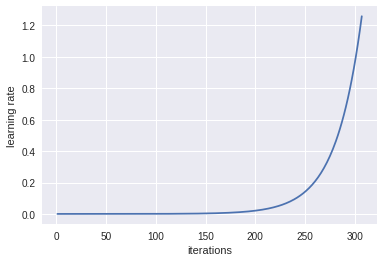

In [71]:
learn.sched.plot_lr()

Note that in the previous plot *iteration* is one iteration (or *minibatch*) of SGD. In one epoch there are 
(num_train_samples/num_iterations) of SGD.

We can see the plot of loss versus learning rate to see where our loss stops decreasing:

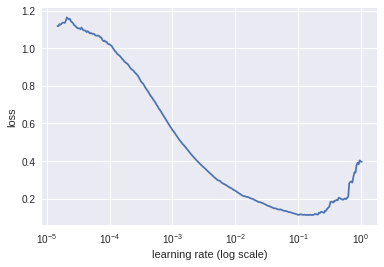

In [72]:
learn.sched.plot()

The loss is still clearly improving at lr=1e-2 (0.01), so that's what we use. Note that the optimal learning rate can change as we training the model, so you may want to re-run this function from time to time.

In [0]:
learn.sched.plot??